In [116]:
import skimage
import skimage.io
import skimage.transform
import os
import numpy as np
import utils
import matplotlib.pyplot as plt

/tmp/ipykernel_10003/1161064218.py:55: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(fft_shift)), cmap="gray")
/tmp/ipykernel_10003/1161064218.py:59: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(filtered)), cmap="gray")
/tmp/ipykernel_10003/1161064218.py:66: RuntimeWarning: divide by zero encountered in log
  utils.save_im("gabagoo.png", utils.normalize(np.log(np.abs(filtered))))
/home/bard/Documents/school/gruvis/TDT4195/assignment 2/utils.py:165: RuntimeWarning: invalid value encountered in subtract
  return (im - im.min()) / (im.max() - im.min())
/home/bard/Documents/school/gruvis/TDT4195/assignment 2/utils.py:165: RuntimeWarning: invalid value encountered in divide
  return (im - im.min()) / (im.max() - im.min())
/home/bard/Documents/school/gruvis/TDT4195/assignment 2/utils.py:82: UserWarning: Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)
  warnings.warn("Image

Saving image to: image_processed/moon_filtered.png
Saving image to: image_processed/gabagoo.png


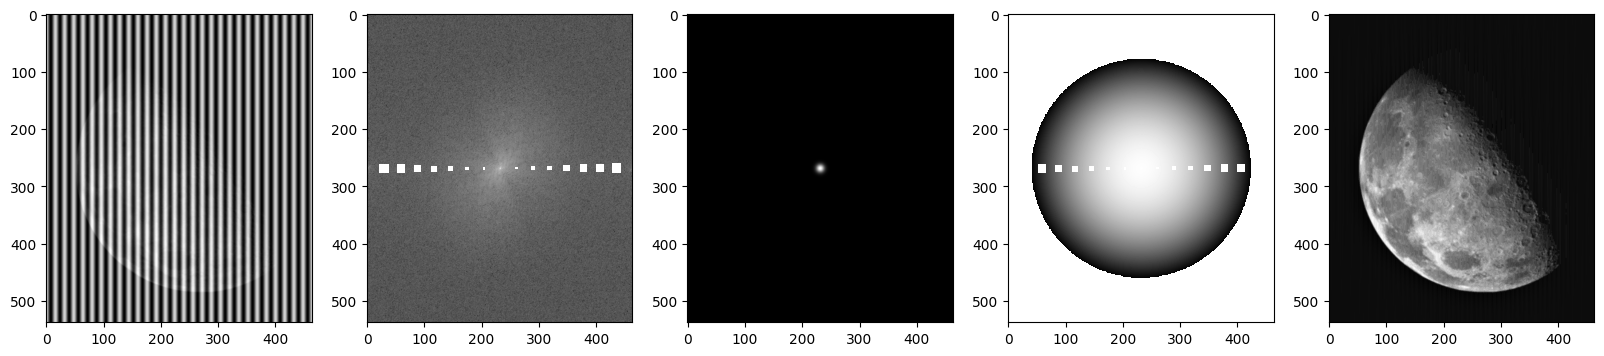

In [117]:
def gaussian_low_pass_filter(distance, cutoff):
    return np.exp(-distance**2/(2*cutoff**2))


if __name__ == "__main__":
    # DO NOT CHANGE
    impath = os.path.join("images", "noisy_moon.png")
    im = utils.read_im(impath)
    

    
    ### START YOUR CODE HERE ### (You can change anything inside this block)    
    
    fft = np.fft.fft2(im)
    fft_shift = np.fft.fftshift(fft)
    n = 1
    while 1:
        if len(fft_shift[fft_shift.shape[0]//2]) < fft_shift.shape[1]//2 + n*29:
            break
        
        if len(fft_shift[fft_shift.shape[0]//2]) == fft_shift.shape[1]//2 + n*29:
            for i in range(n,n):
                for j in range(-n,n):
                    fft_shift[fft_shift.shape[0]//2 + j][fft_shift.shape[1]//2 +n*29 - i] = 1/np.inf
                    fft_shift[fft_shift.shape[0]//2 - j][fft_shift.shape[1]//2 -n*29 + i] = 1/np.inf
            break        
        
        
        for i in range(-n,n):
            for j in range(-n,n):
                fft_shift[fft_shift.shape[0]//2 + j][fft_shift.shape[1]//2 +n*29 + i] = 1/np.inf
                fft_shift[fft_shift.shape[0]//2 - j][fft_shift.shape[1]//2 -n*29 - i] = 1/np.inf
        n += 1
    
    guassian_filter = np.zeros(fft_shift.shape)
    for i in range(fft_shift.shape[0]):
        for j in range(fft_shift.shape[1]):
            guassian_filter[i][j] = gaussian_low_pass_filter(np.sqrt((fft_shift.shape[0]//2 - i)**2 + (fft_shift.shape[1]//2 - j)**2), 5)
    
    filtered = fft_shift 
    unblurred_im = np.fft.ifft2(np.fft.ifftshift(filtered))
    unblurred_im = np.abs(unblurred_im)
    
    filtered = fft_shift * guassian_filter
    filterd_im = np.fft.ifft2(np.fft.ifftshift(filtered))
    filterd_im = np.abs(filterd_im)
    
    sharpened = unblurred_im + 0.1*(unblurred_im - filterd_im)

    
    plt.figure(figsize=(20, 4))
    plt.subplot(1, 5, 1)
    plt.imshow(im, cmap="gray")
    plt.subplot(1, 5, 2)
    plt.imshow(np.log(np.abs(fft_shift)), cmap="gray")
    plt.subplot(1, 5, 3)
    plt.imshow((np.abs(guassian_filter)), cmap="gray")
    plt.subplot(1, 5, 4)
    plt.imshow(np.log(np.abs(filtered)), cmap="gray")
    plt.subplot(1, 5, 5)
    plt.imshow(sharpened, cmap="gray")
    

    ### END YOUR CODE HERE ###
    utils.save_im("moon_filtered.png", utils.normalize(sharpened))
    utils.save_im("gabagoo.png", utils.normalize(np.log(np.abs(filtered))))